<center><img src="https://datascientest.fr/train/assets/logo_datascientest.png", style="height:150px"/></center>

<hr style="border-width:2px;border-color:#75DFC1">

<center><img src="https://assets-datascientest.s3.eu-west-1.amazonaws.com/logo+SatisPy+Project.png", style="height:150px"/></center>

<center><h1>Exploration Visualisation & Préparation des données </h1></center>

# Objectifs :

L'objectif de ce projet est de pouvoir étudier dans un dataset de données, une variable *commentaire* clients, afin de prédire la cible *star* qui est une notation entre 1 et 5 étoiles.

Nous commençons notre étude par les points suivants :

* 1- exploration des données (Viz)
* 2- préparation des données


# 1 - Exploration des données
<hr style="border-width:2px;border-color:#75DFC1">

## Chargement des packages, vue des versions utilisées et préparation de l'affichage

In [1]:
# chargement des packages
import sys
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from collections import Counter
import langid                      # langid non plus
import nltk
# nltk.download()
from nltk.tokenize import PunktSentenceTokenizer,word_tokenize
from nltk.corpus import stopwords 
from wordcloud import WordCloud
from PIL import Image
# Versions
print('Version des librairies utilisées :')
print('Python                : ' + sys.version)
print('NumPy                 : ' + np.version.full_version)
print('Pandas                : ' + pd.__version__)
print('Matplotlib.pyplot     : ' + matplotlib.__version__)
print('Seaborn               : ' + sns.__version__)


# préparation de l'affichage des dataframes => même fonction que le notebook data_explo à séparer dans un outils.py à importer

dico_pd_option = {
    'display.max_rows': 100,    # nbre max de lignes 
    'display.max_column': 50,  # nbre max de colonnes
    'display.width': 50,       # largeur lignes 
    'display.precision': 2,     # precision des valeurs
    'display.max_colwidth': 100  # largeurs colonnes
}
for cle, val in dico_pd_option.items():
    pd.set_option(cle, val)
    
pd.options.display.float_format = "{:,.3f}".format  # affichage pd float à 3 décimales

Version des librairies utilisées :
Python                : 3.7.4 (default, Aug  9 2019, 18:34:13) [MSC v.1915 64 bit (AMD64)]
NumPy                 : 1.21.5
Pandas                : 1.3.5
Matplotlib.pyplot     : 3.5.2
Seaborn               : 0.11.2


## Chargement du data_set et copie en df

In [2]:
df = pd.read_csv('reviews_trust.csv')
df.sample(3)

,Commentaire,star,date,client,reponse,source,company,ville,maj,date_commande,ecart
12246,Les articles n ’ étaient pas complet . Livraison : 5 jours de retard . La moitié de la commande ...,3,2020-07-05,NaN,NaN,TrustedShop,ShowRoom,NaN,NaN,NaN,NaN
3305,Très contente,4,2021-04-01,NaN,"Bonjour , Merci d'avoir partagé votre expérience avec nous , votre message illumine notre journé...",TrustedShop,ShowRoom,NaN,NaN,2021-03-06,26.000
9684,Note globale : 0 ZERO pour MARCHANDISE ET SERVICE CLIENT Je n'ai pas reçu ma commande CAMAÏEU . ...,1,2020-07-29,ANNIE C .,NaN,TrustedShop,ShowRoom,PIERREFITTE NESTALAS,NaN,NaN,NaN


## Informations & descriptions statistiques

In [3]:
# info de base
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19863 entries, 0 to 19862
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Commentaire    19834 non-null  object 
 1   star           19863 non-null  int64  
 2   date           19488 non-null  object 
 3   client         10215 non-null  object 
 4   reponse        8477 non-null   object 
 5   source         19863 non-null  object 
 6   company        19863 non-null  object 
 7   ville          4860 non-null   object 
 8   maj            5 non-null      object 
 9   date_commande  6686 non-null   object 
 10  ecart          6686 non-null   float64
dtypes: float64(1), int64(1), object(9)
memory usage: 1.7+ MB


### Création d'une fonction de description des variables

In [4]:
# description statistique des données
def desc_var(dataframe):
    """
    Retourne la description des variables qualitatives/quantitatives
    ou toutes les variables du dataframe transmis :
    type, nombre de nan, % de nan et desc
    Parameters
    ----------
    @param IN : dataframe : DataFrame, obligatoire

    @param OUT : dataframe de description des variables
    """
    df_taille = dataframe.shape[0]
    # sélection de tous les types de variable dans describe()
    desc_var = dataframe.describe(include='all')
    # dataframe des types des colonnes transposé en ligne pour lecture finale
    desc_type = pd.DataFrame(dataframe[desc_var.columns].dtypes, columns=['type']).T 
    # série du nombre de NaN par colonnes transposé en ligne pour df desc_nan ensuite
    nb_nan = df_taille - desc_var.loc['count'].T
    # série de calcul du %age de NaN par colonnes sur la série nb_nan
    pourcentage_nan = nb_nan * 100 / df_taille
    # dataframe de 2 lignes 'nb_nan' = serie nb_nan et '%nan'=serie pourcentage_nan
    desc_nan = pd.DataFrame([nb_nan, pourcentage_nan], index=['nb_nan', '%_nan']) 
    # fusion de tous les dataframe créés
    desc_var = pd.concat([desc_type, desc_nan, desc_var])
    return desc_var
desc_var(df)

,Commentaire,star,date,client,reponse,source,company,ville,maj,date_commande,ecart
type,object,int64,object,object,object,object,object,object,object,object,float64
nb_nan,29.000,0.000,375.000,"9,648.000","11,386.000",0.000,0.000,"15,003.000","19,858.000","13,177.000","13,177.000"
%_nan,0.146,0.000,1.888,48.573,57.323,0.000,0.000,75.532,99.975,66.339,66.339
count,19834,"19,863.000",19488,10215,8477,19863,19863,4860,5,6686,"6,686.000"
unique,17174,NaN,1880,7569,2033,2,2,2457,5,385,NaN
top,Parfait,NaN,2020-06-12,Client,"Bonjour , Merci d'avoir partagé votre expérience avec nous , votre message illumine notre journé...",TrustedShop,ShowRoom,Paris,2021-04-30,2020-08-19,NaN
freq,284,NaN,257,31,1162,14503,16823,110,1,73,NaN
mean,NaN,3.408,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.286
std,NaN,1.651,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.373
min,NaN,1.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000


## DataViz

### Objectifs
* 1- Visualisation des données 
* 2- Identification des relations entre les variables 
* 3- Identification des variables explicatives et de la variable cible

### Distribution *Star* variable cible

la distribution star (%): 
5   40.175
1   25.787
4   18.653
3    8.795
2    6.590
Name: star, dtype: float64
------------------------------------------


Text(0.5, 1.0, 'Distribution Star')

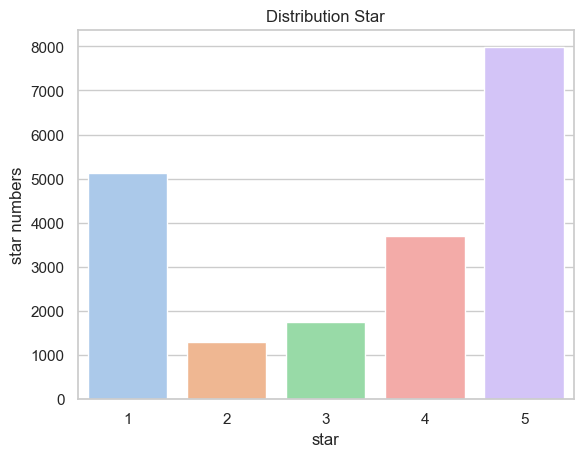

In [5]:
sns.set_theme(style="whitegrid", palette="pastel")
print('la distribution star (%): ')
print(round(df.star.value_counts(normalize = True)*100,3)) 
print('------------------------------------------')
plt.plot(figsize = (6,3))
sns.countplot(x = df['star']);
plt.ylabel('star numbers')
plt.title('Distribution Star')


## Distribution *star* avec filtre *reponse*

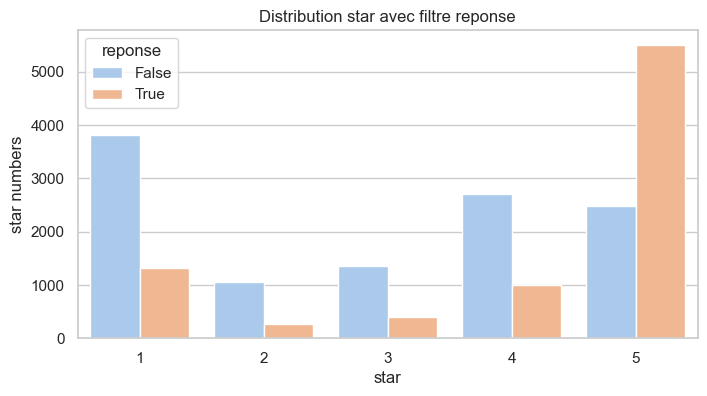

In [6]:
fig, ax = plt.subplots(figsize=(8,4));
sns.countplot(x = df.star, hue= df.reponse.notnull(), ax=ax).set(title = "star")
plt.ylabel('star numbers')
plt.title('Distribution star avec filtre reponse');

Établissons le classement des notes par étoiles suivant :

* 1 étoile = client très mécontent
* 2 étoiles = client peu content
* 3 étoiles = client moyennement satisfait
* 4 étoiles = client satisfait
* 5 étoiles = client très satisfait   

Le graphe de distribution du nombre d'étoiles en fonction des réponses du site marchand montre que :

* les réponses du site se font majoritairement sur les clients très satisfaits (anormal => voir conseil au service marketing)
* le site a peu répondu aux clients très mécontents (anormal idem)
* A l'exception des clients 'très satisfaits', le site répond peu aux notations et commentaires (anormal idem )
* dans tous les cas, il y a beaucoup de notations sans réponse du site

## Distribution *source* avec filtre *star*

Text(0.5, 1.0, 'Distribution source avce filtre star')

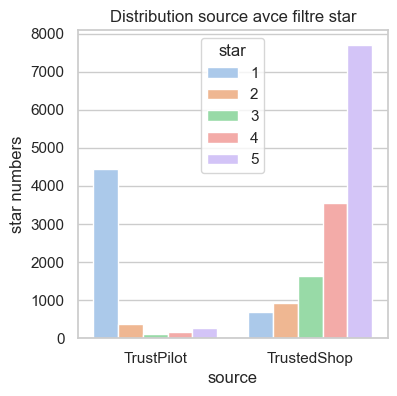

In [7]:
df.source.unique()
fig, ax = plt.subplots(figsize=(4,4));
sns.countplot(x= df.source, hue = df.star, ax = ax);
plt.ylabel('star numbers')
plt.title("Distribution source avce filtre star")

Il y a deux entreprises sources de nos données

* TrustPilot
* TrustedShop

Variation des données entre ces 2 entreprises

* TrustedShop a beaucoup + de données 'star' récoltées que son concurrent
* TrustPilot a essentiellement des notes de clients très mécontents
* TrustedShop a une grande majorité de clients très satisfaits, jusqu'aux clients peu contents

## Distributions des sites marchands de compagny avec filtre star ou filtre source

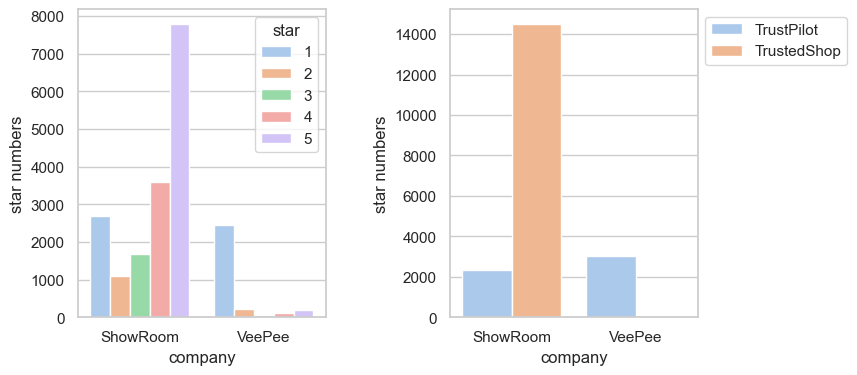

In [8]:
df.company.unique()
# ['ShowRoom', 'VeePee']
fig, ax = plt.subplots(figsize=(8,4));
plt.subplots_adjust(wspace = 0.5)
plt.subplot(121)
sns.countplot(x = df.company, hue = df.star);
plt.ylabel('star numbers')
plt.subplot(122)
fg = sns.countplot(x =df.company, hue = df.source);
fg.legend(bbox_to_anchor= (1,1))
plt.ylabel('star numbers');


Site marchand **showroom**

* il a la grande majorité de notations étoiles
* il a une grande majorité de clients très satisfaits et satisfaits, avec cependant un nombre non négligeable de clients moyennement satisfaits à très mécontents
* les sources de notations proviennent des 2 entreprises 'TrustPilot' et 'TrustedShop' avec une grande majorité pour ce dernier

Site marchand **VeePee**

* il a peu de notations comparé à son concurrent 'showRoom'
* la grande majorité des notations concerne les clients très mécontents (=> voir marketing service )
* l'entreprise 'VeePee' est la seule source de données de notations

## Analyse de *ville* de la clientèle

In [9]:
vill_num = len(df.ville.unique())
print('il y a ', vill_num, ' villes différentes')
# il y a 2458 ville différentes
# afficher les top 20 villes
df.ville = df.ville.str.lower() # certaines ville est en majuscule, convertir en minuscule
top20 = df.ville.value_counts().head(20)
print('------------------------------------------------------')
print('top 20: ')
print(top20)

il y a  2458  villes différentes
------------------------------------------------------
top 20: 
paris                 140
marseille              66
lyon                   62
toulouse               49
strasbourg             39
nice                   38
lisboa                 33
brive la gaillarde     32
chatenay malabry       31
bor                    26
toulon                 22
portugal               22
nantes                 20
nancy                  20
robert                 19
porto                  19
metz                   19
fort                   18
caen                   18
rennes                 18
Name: ville, dtype: int64


**Conclusions** :

* la colonne ville a un taux de null: 75.53%
* le top 20 est propablement une conclusion biaisée au vu du pourcentage élevé des valueurs manquantes
* il semblerait malgré tout que les clients renseignés dans cette colonne proviennent de France mais c'est un top 20 sur 2458 villes.

## Écart en jours entre *date_commande* et date des notations ou commentaires clients

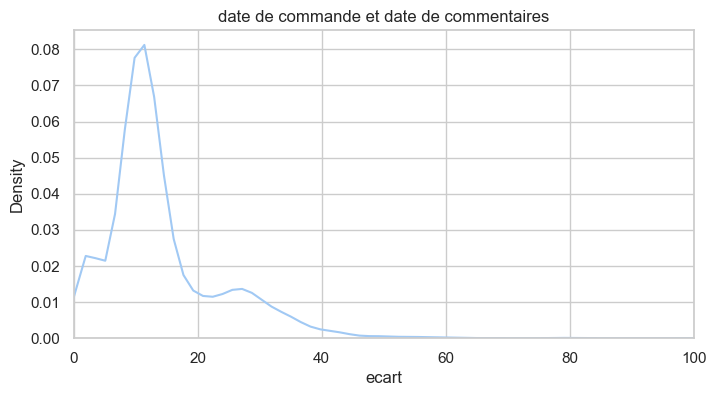

In [10]:
# ecart
fig, ax = plt.subplots(figsize=(8,4));

ax.set_xlim(xmin=0, xmax=100)
sns.kdeplot(df['ecart'], ax=ax);
plt.title('date de commande et date de commentaires');

* Le délai entre la date de commande et l'avis du client reçu est proche de 15 jours
* ce résultat est biaisé par le fort pourcentage de NaN à 66.34%
* il y a aussi le biais du délai de livraison qui n'est pas rendu compte

## Chronologie des notations par Années

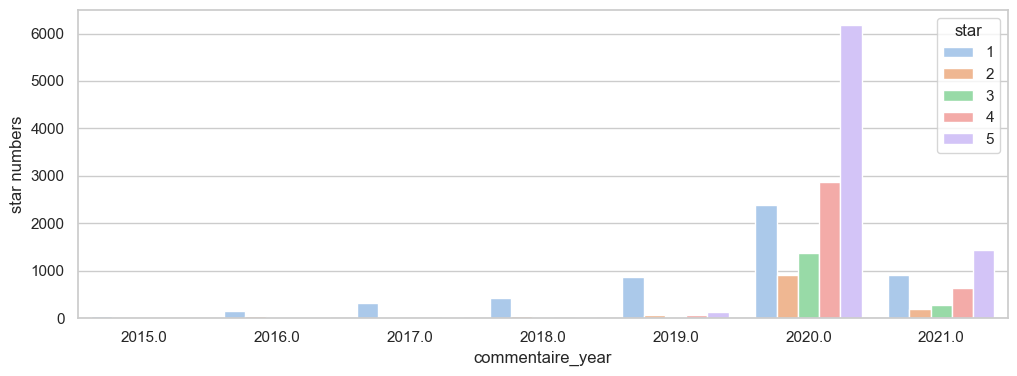

In [11]:
# date et date_commande
# extraire les années,négliger le mois, jour et le temps
# raison : voir seulement les évolutions selon les années
df['commentaire_year'] = pd.to_datetime(df.date,utc= True).dt.year
fig, ax = plt.subplots(figsize=(12,4));
sns.countplot(x = df.commentaire_year, hue= df.star, ax=ax);
plt.ylabel('star numbers');


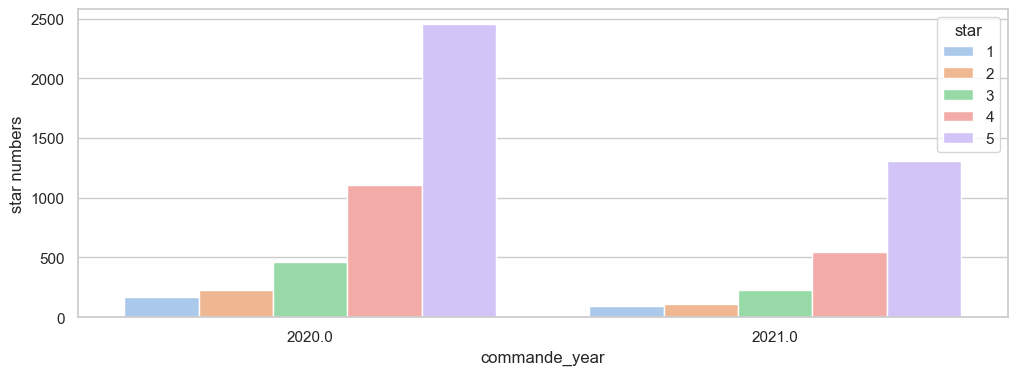

In [12]:
# commande date
df['commande_year']= pd.to_datetime(df.date_commande,utc= True).dt.year
# df = df.astype({'commande_year':int})

fig, ax = plt.subplots(figsize=(12,4));
sns.countplot(x = df.commande_year, hue= df.star, ax=ax);
plt.ylabel('star numbers');


Il y a 66.34% de NaN sur date_commande, le graphe présente essentiellement les informations en 2020 et 2021

>NOTE: le type 'commentaire_year' est float, parce qu'il y a des NAN (données manquantes) dans les années 'commande_year' & 'commentaire_year' => on ne peut pas convertir le type float à int mais il n'y a pas de l'influence sur l'analyse


* Evolution lente des commandes et notations clients à moins de 1000 par an jusqu'en 2019
* à partir de 2020, il y a une explosion des commandes, avec une majorité relative de notations positives et cependant bon nombre de clients très mécontents
* l'année 2021 semble biaisée par manque de données : à vérifier les dates les plus récentes de notations 'star' où absence de NaN

## remarque sur *date_commande* et *date*

In [13]:
df[(df['commentaire_year'].isna()) & (df['commande_year'].notnull())]

,Commentaire,star,date,client,reponse,source,company,ville,maj,date_commande,ecart,commentaire_year,commande_year


* on ne peut pas utiliser les dates de commandes pour compléter les dates de commentaires.
* de plus, le taux de null de *date_commande* est 66.4% et il est pour *date* est 1.89%.

**conseil** : à supprimer la colonne *date_commande* dans l'étape 'cleaning'

## *client* et *maj*
Ces 2 colonnes nous sont inutiles pour notre étude :

* *client* nous donne les noms et prénoms des clients, la colonne est donc a supprimer
* *maj* contient 99.97% de NaN est de type date mais non exploitable, colonne à éliminer également

## Traitement Texte de *Commentaire* clients => étude séparée

# 2- Préparation des données
<hr style="border-width:2px;border-color:#75DFC1">


Il y a trois tâches principales : 
* 1- nettoyer des données
* 2- traitement des données (*commentaires, data, star* etc)
* 3- sauvegarde des données

### Traitement de texte 
**Objectif** : 
* 1- Visualisation des textes par **WordCloud**
* 2- Préparation des textes pour la modélisation

#### Texte - *Commentaire*
Les tâches principales : 
* 1- Nettoyer le texte 
* 2- Classifier le texte sur les différents langages
* 3- Tokeniser le texte
* 4- Filter les mots vides (une liste de mots vides personnalisé incluse)
* 5- Viz "WordCloud"

> **NOTE**:
>
> Tâche 3 et 4 servent principalement le "WordCloud" (visualisation). Il y aura une tokenization plus détaillée/affinée dans la partie PP2_Traitement-variable-*commentaire*. La tokenization est essentielle et importante pour la modélisation.


In [14]:
# élimination des 465 lignes doublons
# la totalité des commentaire est mis en minuscule
df.Commentaire = df.Commentaire.str.lower()
print('vérifier les doublons: ' ,df.duplicated().sum())
df.drop_duplicates(inplace = True)
print('vérifier les doublons après drop_duplicates: ',df.duplicated().sum())

vérifier les doublons:  465
vérifier les doublons après drop_duplicates:  0


In [15]:
# conserver l'index origine pour faire la comparaison / amélioration finale
df['index_org'] = df.index
df['star_org']=df.star

## Nettoyage des données

L'analyse de l'exploration des données nous préconise d'**éliminer** les colonnes suivantes :

* client : info personnelle
* data_commande : taux de NaN important, ne propose pas plus des informations
* colonne commande_year (créé) : idem data_commande
* maj : taux de nulle importante 99.98%
* ecart : intervalle entre les date. ne propose pas plus des informations

Dont les colonnes à **conserver** :
* Commentaire
* star
* source
* company
* date
* index_org
* star_org

In [16]:
# selectionner les variables intéresssantes
df = df.loc[:,['Commentaire', 'star','source','company','date','index_org','star_org']]
# # supprimer les lignes vides car elles empechent le traitement text
df = df.dropna()
print('vérification les données manquantes: ')
print(df.isna().sum())

vérification les données manquantes: 
Commentaire    0
star           0
source         0
company        0
date           0
index_org      0
star_org       0
dtype: int64


## Extraire les commentaires 'Français'

In [17]:
# extraire les données français

# a) Décompte du nombre de langues
# compter le nombre de langues et extraire les commentaires en français et en anglais

counts = [] # préparation du compteur de décompte des langues
df_fr= pd.DataFrame(columns = ['Commentaire', 'star','source','company','index_org','star_org']) # préparation du dataframe des commentaires français
df_en= pd.DataFrame(columns = ['Commentaire', 'star','source','company','index_org','star_org']) # préparation du dataframe des commentaires anglais

for i in range(len(df)):
    lang= langid.classify(str(df.iloc[i,0]))
#   la sortie est un set (laguage, lagague probability)
    counts.append(lang[0])
    #  extraire les commentaires en français et anglais
    
    if lang[0] =='fr':
        df_fr=df_fr.append(df.iloc[i,:],ignore_index=True)  
    elif lang[0] == 'en': 
        df_en=df_en.append(df.iloc[i,:],ignore_index=True)  
        

## Justification : pourquoi on garde seulement les commentaires en 'français' ?

In [18]:
# justification : pourquoi on garde seulement français
result = Counter(counts)
# un dict avec la langage et son occurence
# proporton de chaque langage
df_lan = pd.DataFrame(counts,columns =['language'])
pro_lan = df_lan['language'].value_counts(normalize = True).sort_values(ascending = False)
# top 10 language
print(pro_lan[:10])

fr   0.871
en   0.042
it   0.021
es   0.021
pt   0.019
wa   0.006
de   0.004
oc   0.002
mt   0.002
nl   0.002
Name: language, dtype: float64


Plus de 87% des commentaires sont répertoriés en Français, mais après une analyse visuelle sur les résultats, il y a certain commentaires Français qui sont classés comme Anglais. L'inverse est également possible mais la quantité de lignes classées fr implique plutôt une vérification sur les erreurs réalisées par nos modèles de prédiction.

Un filtrage manuel sur le petit corpus Anglais est donc effectué afin d'augmenter le corpus Français et ne considérer que ce dernier. 

### Sauvegarder des résultats 

In [19]:
df_fr.to_csv('reviews_trust_fr_VF.csv')
df_en.to_csv('reviews_trust_en_VF.csv')

il y a des commentaires français qui sont classifiés dans le df_en. il faut les identifier et remettre à df_fr. 
identification des commentaires français dans df_en est faite visuellement. 

In [21]:
drop_list_en = pd.read_csv('drop_list_en.csv')
# document'drop_list_en.csv' est le filtrage anglais=>français
display(drop_list_en.head())
drop_list_en = drop_list_en['drops'].tolist()
# si on a besoin de modifier la drop liste, la modification peut être faite dans le document .csv

# effacement des lignes autres que fr dans df_en
df_en.drop(drop_list_en, axis=0, inplace=True) # reste 690 ligne en Français
# concaténation horizontale de df_fr et df_en restant ( 16870 + 690 = 17560 lignes finales )
df_fr = pd.concat([df_fr, df_en], axis=0)
# reset des index pour éviter les doublon d'indices des lignes après concaténation
df_fr.reset_index(inplace=True, drop=True)

,drops
0,0
1,1
2,2
3,7
4,8


### Sauvegarder des résultats

In [22]:
df_fr.to_csv('reviews_trust_fr_VF.csv')

## WordCloud

Le nuage de mots (*WordCloud*) est une représentation visuelle qui complète une section de texte pour aider les lecteurs à mieux visualiser la présence de mots clés du texte concerné

La bibliothèque **wordcloud** implémente un algorithme permettant d'afficher un nuage de mots d'un texte. Cet algorithme regroupe les étapes suivantes :

* a- Tokeniser le texte passé en paramètre
* b- Filtrer les mots vides
* c- Calculer la fréquence des mots
* d- Représenter visuellement les mots-clefs les plus fréquents sous forme de nuage de mots
(source: https://train.datascientest.com/)


### Un nuage de mots est fait sur la colonne 'commentaire'


In [23]:
# on se concentre sur la colonne 'Commentaire'
df_txt = df.loc[:,'Commentaire'].to_frame()
# to_frame() pour changer le type series en dataframe. faciliter les étapes suivantes

Il y a deux méthodes principales de tokenization : 

* la méthode *word_tokenize* (sous package nltk.tokenize) : à découper une ou plusieurs phrases en mots uniques.
* la méthode *RegexpTokenizer* (sous package nltk.tokenize.regexp) : à découper des phrases en mots ** Et en ne conservant que les mots remplissant une condition**

*word_tokenize* fonctionne bien au niveau de la tokenization, elle **garde tous les contenus de textes d'origine** (comme les chiffres etc). Afin d'avoir un résultat purement texte, il faut compléter la liste de "stop-words" et faire une filtrage supplémentaire. 

*RegexpTokenizer* fait la tokenization avec un filtrage en parallèle. Cette méthode donne un résultat plus précis. 

Dans le projet, on a appliqué les deux méthodes pour faire une tokenization.

In [24]:
# # on a appliqué ici la méthode word_tokenize pour cette simple visualisation, et on a choisi la méthode Regexp pour la suite du projet
# df_fr['tokens'] = df_fr.apply(lambda x : word_tokenize(x['Commentaire'],language = 'french'),axis = 1)
# df_fr.head()

In [25]:
from nltk.tokenize.regexp import RegexpTokenizer
tokenizer = RegexpTokenizer(r"[a-zA-Zé]{3,}")
tokens=[]
for i in range(df_txt.shape[0]):
    tokens.append(tokenizer.tokenize(df_txt.iloc[i,0]))
df_txt['tokens'] = tokens
df_txt.head(2)

,Commentaire,tokens
0,"bonjour , ca doit faire 5 ans environ que je suis membre showrooprive . je n ’ ai jamais eu de s...","[bonjour, doit, faire, ans, environ, que, suis, membre, showrooprive, jamais, soucis, particulie..."
1,vente lacoste article manquant photo prise sur 6 articles la moitié livrée sans explication manq...,"[vente, lacoste, article, manquant, photo, prise, sur, articles, moitié, livrée, sans, explicati..."


In [27]:
# chargement fichier excel de stop words french en dataframe
df_stop_word_xls = pd.read_excel('stopwords_liste_zang.xlsx', header=None)

# verif NaN 
print("présence de NaN dans le fichier 'stopwords_liste_ . xls", df_stop_word_xls.isna().sum())
print("nombre de mots stoppés : ", df_stop_word_xls.shape[0])

# création de stop words set
# liset selon nltk.corpus
update_list_fr_org = set(stopwords.words('french'))
# liste selon le retour d'expérience projet
update_list_fr = list(df_stop_word_xls[0])
# liste selon le rex wordcloud
update_list_fr2 = ['les','sur','ans','bonjour','commandé','commande','plu','faire','chez','produit','ça','car','article','doit','vente',
                  "j'ai","très","trop","c'est","produit",'site','attend','toujours','client','achat','cela','jour','jours',
                 'a',"cette","sent","comme","donc","plus","quand",'réponse', 'euro','tout','reçu','surtout','dit',
                 'après','alors','bref','temp','temps','là','vraiment',"qu'il", 'part','autre', 'produits','dire','demande','mais','sans',
                 'avoir','fait','encore',"n'est","n'a",'si','mois','passé','commandes','disant','semaine','euros','depuis']

# initialisation de la variable des mots vides
stop_words = set()
stop_words.update(update_list_fr)
stop_words.update(update_list_fr_org)
stop_words.update(update_list_fr2)
# fonction de filtrage
def stop_words_filtering(mots, stop_words) : 
    tokens = []
    for mot in mots:
        if mot not in stop_words: 
            tokens.append(mot)
    return tokens

""" raccourcir les mons de variables ci-dessous au moins pour les 2 dernières colonnes """
# création des tokens filtrés par stop_words.update et ajout de la colonne créé
df_txt['no_stop_words'] = df_txt['tokens'].apply(lambda x : stop_words_filtering(x,stop_words))   # ok parfait

df_txt.head(2)

présence de NaN dans le fichier 'stopwords_liste_ . xls 0    0
dtype: int64
nombre de mots stoppés :  216


,Commentaire,tokens,no_stop_words
0,"bonjour , ca doit faire 5 ans environ que je suis membre showrooprive . je n ’ ai jamais eu de s...","[bonjour, doit, faire, ans, environ, que, suis, membre, showrooprive, jamais, soucis, particulie...","[membre, showrooprive, jamais, soucis, particulier, petites, bricoles, contre, derniers, vraie, ..."
1,vente lacoste article manquant photo prise sur 6 articles la moitié livrée sans explication manq...,"[vente, lacoste, article, manquant, photo, prise, sur, articles, moitié, livrée, sans, explicati...","[lacoste, manquant, prise, articles, moitié, livrée, explication, manque, respect, numero]"


il y a trois listes de mots vides:
* 1- une liste origine proposé par nltk.corpus (*update_list_fr_org*)
* 2- une liste personnalisée selon le retour d'expérience projet (*update_list_fr*)
* 3- une liste personnalisée selon le retour d'expérience 'WordCloud'(*update_list_fr2*)

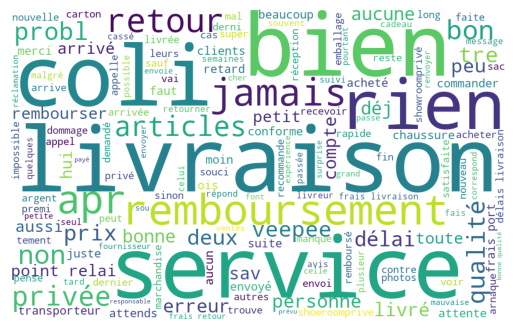

In [29]:
# wordcloud - français 
text_fr = ""
for comment in df_txt['no_stop_words']:
    text_fr += ' '.join(comment)
mask = np.array(Image.open("cloud.png"))
mask[mask == 1] = 255
from PIL import Image
wordcloud = WordCloud(background_color = "white", stopwords = stop_words, max_words = 150, mask = mask).generate(text_fr)
plt.imshow(wordcloud)
plt.axis("off")
plt.show();
